In [211]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")

## Import PPO Results

In [197]:
import re
import csv

# Define a regular expression pattern to match relevant lines
pattern = r'score : ([\d.]+), steps : (\d+), progress : ([\d.]+)%'

# Open the input text file and the output CSV file
with open('../vista_nautilus/results/CNN/minimal_ppo_trial3_47.txt', 'r') as infile, open('ppo_trial3.csv', 'w', newline='') as outfile:
    csv_writer = csv.writer(outfile)
    csv_writer.writerow(['reward', 'steps', 'progress'])  # Write CSV header

    lines = infile.readlines()
    for i in range(len(lines)):
        match = re.search(pattern, lines[i])
        if match:
            reward = float(match.group(1))
            steps = int(match.group(2))
            progress = float(match.group(3))

            csv_writer.writerow([reward, steps, progress])

print("CSV file has been created.")

CSV file has been created.


In [198]:
ppo1 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial2_47.txt",sep='\t')
ppo1['trial'] = 1
ppo1 = ppo1.reset_index()
ppo1 = ppo1.rename(columns={"index":"Episode"})

ppo2 = pd.read_csv("ppo_trial3.csv")
ppo2['trial'] = 2
ppo2 = ppo2.reset_index()
ppo2 = ppo2.rename(columns={"index":"Episode"})

ppo3 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial4_47.txt",sep='\t')
ppo3['trial'] = 3
ppo3 = ppo3.reset_index()
ppo3 = ppo3.rename(columns={"index":"Episode"})

ppo4 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial5_47.txt",sep='\t')
ppo4['trial'] = 4
ppo4 = ppo4.reset_index()
ppo4 = ppo4.rename(columns={"index":"Episode"})

ppo_df = pd.concat([ppo1, ppo2, ppo3, ppo4])
ppo_df["source"] = "PPO"

ppo_df = ppo_df.groupby('Episode')['reward'].mean()
ppo_df = ppo_df.to_frame().reset_index()
ppo_df["source"] = "PPO"
ppo_df['Average Reward'] = ppo_df['reward'].rolling(window=10).mean()

## Import A2C Results

In [199]:
a2c1 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_9th_trial_s47.txt",sep='\t')
a2c1['trial'] = 1
a2c1 = a2c1.reset_index()
a2c1 = a2c1.rename(columns={"index":"Episode"})

a2c2 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug9cnn2_3worker_6th_trial_s47.txt",sep='\t')
a2c2['trial'] = 2
a2c2 = a2c2.reset_index()
a2c2 = a2c2.rename(columns={"index":"Episode"})

a2c3 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_9th_trial_s47.txt",sep='\t')
a2c3['trial'] = 3
a2c3 = a2c3.reset_index()
a2c3 = a2c3.rename(columns={"index":"Episode"})

a2c4 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_10th_trial_s47.txt",sep='\t')
a2c4['trial'] = 4
a2c4 = a2c4.reset_index()
a2c4 = a2c4.rename(columns={"index":"Episode"})

a2c_df = pd.concat([a2c1, a2c2, a2c3, a2c4])
a2c_df["source"] = "A2C"

a2c_df = a2c_df.groupby('Episode')['reward'].mean()
a2c_df = a2c_df.to_frame().reset_index()
a2c_df["source"] = "A2C"
a2c_df['Average Reward'] = a2c_df['reward'].rolling(window=10).mean()

## Import REINFORCE results

In [200]:
reinforce1 = pd.read_csv("../vista_nautilus/results/CNN/collision7.txt",sep='\t')
reinforce1['trial'] = 1
reinforce1 = reinforce1.reset_index()
reinforce1 = reinforce1.rename(columns={"index":"Episode"})
reinforce1 = reinforce1.reset_index()
reinforce1 = reinforce1.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})
# vreinforce1 = reinforce1.rename(columns={"index":"Episode"})

# reinforce2 = pd.read_csv("reinforce_trial3.csv")
# reinforce2['trial'] = 2
# reinforce2 = reinforce2.reset_index()
# reinforce2 = reinforce2.rename(columns={"index":"Episode"})

reinforce3 = pd.read_csv("../vista_nautilus/results/CNN/collision8.txt",sep='\t')
reinforce3['trial'] = 3
reinforce3 = reinforce3.reset_index()
reinforce3 = reinforce3.rename(columns={"index":"Episode"})
reinforce3 = reinforce3.reset_index()
reinforce3 = reinforce3.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})

reinforce4 = pd.read_csv("../vista_nautilus/results/CNN/collision9.txt",sep='\t')
reinforce4['trial'] = 4
reinforce4 = reinforce4.reset_index()
reinforce4 = reinforce4.rename(columns={"index":"Episode"})
reinforce4 = reinforce4.reset_index()
reinforce4 = reinforce4.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})

reinforce_df = pd.concat([reinforce1, reinforce3, reinforce4])
reinforce_df["source"] = "REINFORCE"

reinforce_df = reinforce_df.groupby('Episode')['reward'].mean()
reinforce_df = reinforce_df.to_frame().reset_index()
reinforce_df["source"] = "REINFORCE"
reinforce_df['Average Reward'] = reinforce_df['reward'].rolling(window=10).mean()

In [201]:
reinforce_df

,Episode,reward,source,Average Reward
0,0,71.326449,REINFORCE,NaN
1,1,11.710133,REINFORCE,NaN
2,2,18.898867,REINFORCE,NaN
3,3,23.642800,REINFORCE,NaN
4,4,27.452033,REINFORCE,NaN
...,...,...,...,...
420,420,48.505900,REINFORCE,51.53176
421,421,47.041300,REINFORCE,50.82840
422,422,48.249800,REINFORCE,50.22644
423,423,47.604600,REINFORCE,49.65809


## Combine Results

In [202]:
df = pd.concat([ppo_df, a2c_df[:250],reinforce_df[:250]]).reset_index()
df

,index,Episode,reward,source,Average Reward
0,0,0,40.970754,PPO,NaN
1,1,1,317.964947,PPO,NaN
2,2,2,480.403921,PPO,NaN
3,3,3,44.120392,PPO,NaN
4,4,4,41.814749,PPO,NaN
...,...,...,...,...,...
744,245,245,29.951900,REINFORCE,27.581593
745,246,246,28.391267,REINFORCE,27.896470
746,247,247,29.383267,REINFORCE,28.288240
747,248,248,30.028167,REINFORCE,28.626290


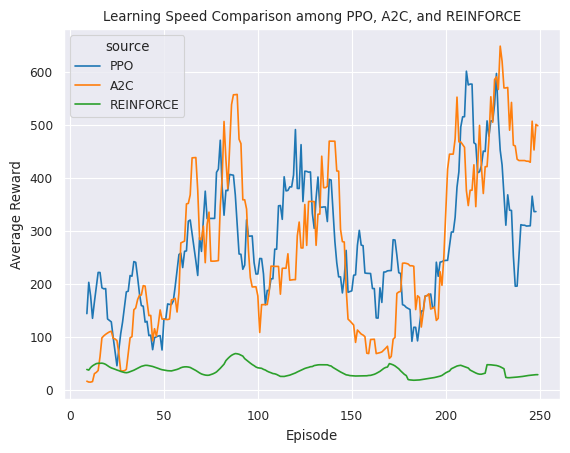

In [212]:
cnn_benchmark1 = sns.lineplot(data=df,x="Episode",y="Average Reward",hue="source").set_title("Learning Speed Comparison among PPO, A2C, and REINFORCE")
fig = cnn_benchmark1.get_figure()
fig.savefig("b1.png") 